# Week4授業前課題2 住宅価格の予測

In [65]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

## 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [2]:
data = pd.read_csv("train.csv")
X = data.loc[:, ["GrLivArea", "YearBuilt"]]
y = data["SalePrice"]

## 【問題2】線形回帰による推定と評価
<pre>
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。

sklearn.linear_model.LinearRegression — scikit-learn 0.20.2 documentation

評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。

sklearn.metrics.mean_squared_error — scikit-learn 0.20.2 documentation

可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train_sc, y_train)

/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
y_pred = lr.predict(X_test_sc)
y_mean_squard_error = mean_squared_error(y_test, y_pred)
print("評価は：", y_mean_squard_error)

評価は： 2490596336.6691375


In [5]:
print(lr.coef_)
print(lr.intercept_)

[48312.57752432 31618.74747992]
181441.54195205486


In [15]:
X_GArea = X_train["GrLivArea"].values
Y_YBuilt = X_train["YearBuilt"].values
Z = y_train.values

In [34]:
X_GArea_sc = X_train_sc[:, 0]
Y_YBuilt_sc = X_train_sc[:, 1]

In [9]:
def func(X, Y):
    Z_formula = 48312.6*X + 31618.7*Y - 181441.54
    return Z_formula

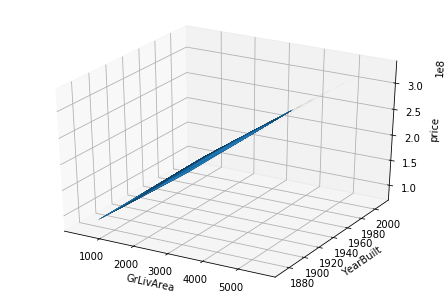

In [23]:
fig = plt.figure()
ax = Axes3D(fig)

X_mesh, Y_mesh = np.meshgrid(X_GArea, Y_YBuilt)
Z_XY = func(X_mesh, Y_mesh)

ax.plot_surface(X_mesh, Y_mesh, Z_XY)
ax.set_xlabel("GrLivArea")
ax.set_ylabel("YearBuilt")
ax.set_zlabel("price")

plt.show()

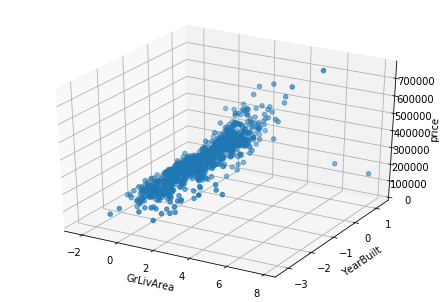

In [37]:
fig2 = plt.figure()
ax2 = Axes3D(fig2)

ax2.scatter(X_GArea_sc, Y_YBuilt_sc, y_train)
ax2.set_xlabel("GrLivArea")
ax2.set_ylabel("YearBuilt")
ax2.set_zlabel("price")
plt.show()

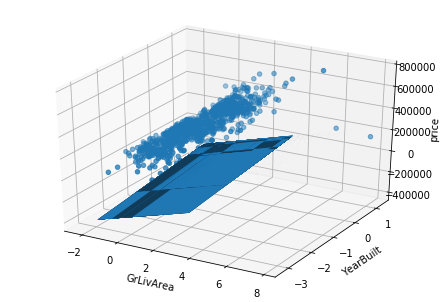

In [39]:
fig1 = plt.figure()
ax1 = Axes3D(fig1)

X_mesh, Y_mesh = np.meshgrid(X_GArea_sc, Y_YBuilt_sc)
Z_XY = func(X_mesh, Y_mesh)

ax1.plot_surface(X_mesh, Y_mesh, Z_XY)
ax1.set_xlabel("GrLivArea")
ax1.set_ylabel("YearBuilt")
ax1.set_zlabel("price")

ax1.scatter(X_GArea_sc, Y_YBuilt_sc, Z)
plt.show()

## 【問題3】手法の比較
<pre>
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

線形回帰
SVM
決定木
ランダムフォレスト

In [56]:
svc = SVR()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()

svc.fit(X_train_sc, y_train)
DTR.fit(X_train_sc, y_train)
RFR.fit(X_train_sc, y_train)

/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [57]:
y_svc_pred = svc.predict(X_test_sc)
y_DTR_pred = DTR.predict(X_test_sc)
y_RFR_pred = RFR.predict(X_test_sc)

svc_error = mean_squared_error(y_test, y_svc_pred)
DTR_error = mean_squared_error(y_test, y_DTR_pred)
RFR_error = mean_squared_error(y_test, y_RFR_pred)

In [58]:
result_df = pd.DataFrame({"線形回帰": [y_mean_squard_error],
                        "サポートベクターマシン": [svc_error],
                        "決定木": [DTR_error],
                        "ランダムフォレスト":[RFR_error]},
                        index=["Mean_Squard_Error"])
result_df

,線形回帰,サポートベクターマシン,決定木,ランダムフォレスト
Mean_Squard_Error,2.490596e+09,7.842407e+09,3.032733e+09,1.877446e+09


<pre>
それぞれの数値を見るとランダムフォレストが最も低く、誤差が小さい
よって、最適なモデルはランダムフォレストであると考えられる